<h1>Desafio de Visualización</h1>

<h3>1. Visualización de datos</h3>

In [88]:
#Importamos las librerias necesarias.
import pandas
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import src.graficas as gr

In [2]:
#Lo primero que tenemos que hacer es generar la conexión con nuestra BBDD
base = gr.inicio()

Contraseña de MySQL: ········
¿A que base de datos se quiere conectar?: ufc2


<p>Lo primero que haremos sera ver cual puede ser la división con mas complegidad, para ello tendremos que tener en cuenta que lo que hace complicado un combate es lo dificil que sea conectar los golpes a tu contrincante.</p>
<p>Ahora pasaremos a ver una gráfica con el porcentaje de acierto medio de cada división excepto de "Open Weight" y "Super Heavyweight" las culses son divisiones que ya no existen, estas fueron creadas cuando este deporte aun estaba en vias de desarrollo.</p>
<p>También se excluira "Catch Weight" ya que hace referencia a los combates que han sido relizado fuera del peso autorizado para la división devido a circunstancias irregulares.</p>
<p><b>Gráfica</b></p>

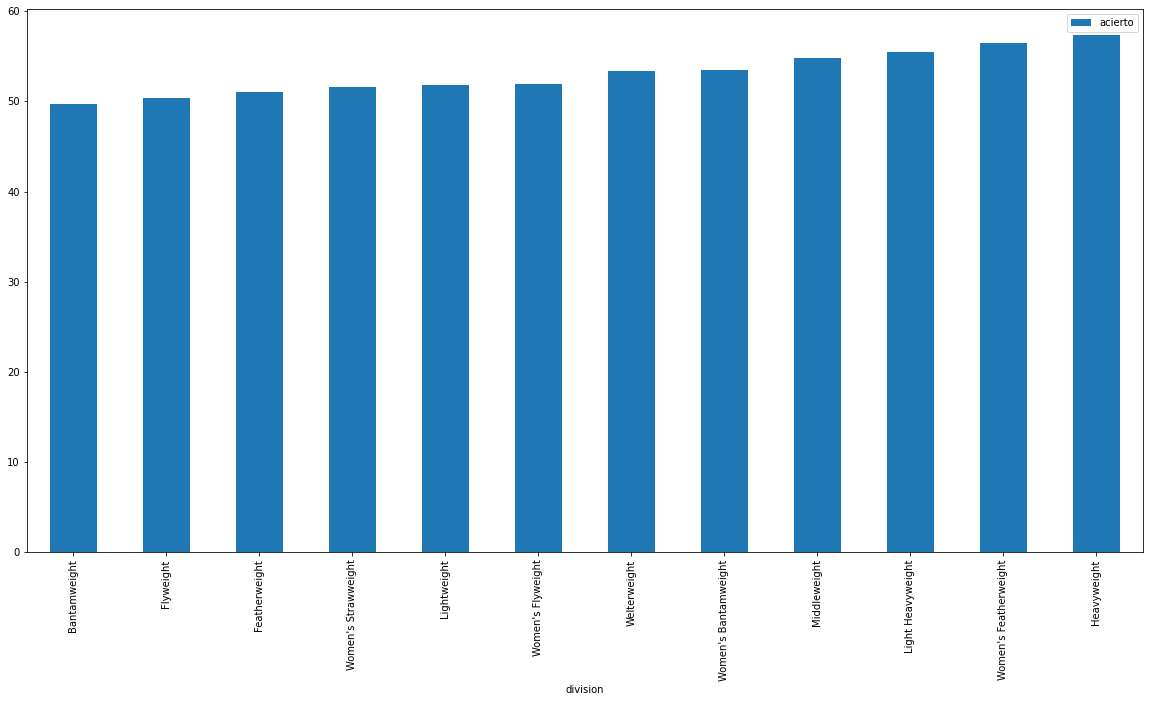

In [122]:
q_p = """
select distinct(division), round(sum(c_total_str)/sum(i_total_str)*100,2) as acierto
from division
natural join pertenece
natural join peleador
natural join se_pelean
where division != "Open Weight" and division != "Super Heavyweight" and division != "Catch Weight"
group by division
order by acierto; 
"""

df_pelota = pd.read_sql(q_p, base)

df_pelota = df_pelota.set_index("division")

df_pelota.plot.bar(figsize=(20, 10));



<p>Podemos ver que en cuanto al striking la división más competitiva es "Bantamweight", seguido por "Featherweight", 
"Flyweight" y "Women's Strawweight", pero tambien tenemos que tener  en cuenta la otra gran parte de las MMA`s es el suelo (takedowns, clinch e intento de sumisiones); entonces tambien veremos cual es la division mas competitiva en cuanto al suelo.</p>

<p>En el control de suelo parece que los mejores son los de "Flyweight" seguido de "Featherweight",
"Lightweight" y "Bantamweight".</p>

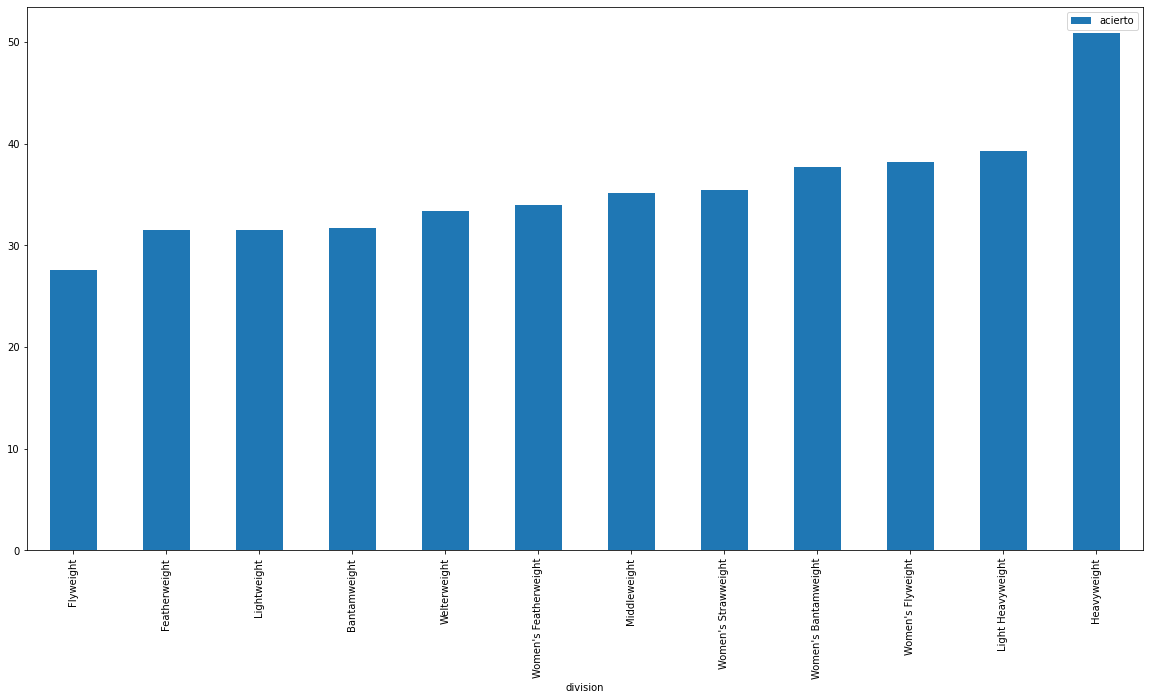

In [123]:
# los mayores indicadores son los "takedowns" y los "intento de sumisiones" en esta gráfica veremos los "takedowns"
q_p2 = """
select distinct(division), round(count(c_td)/sum(i_td)*100,2) as acierto
from division
natural join pertenece
natural join peleador
natural join se_pelean
where division != "Open Weight" and division != "Super Heavyweight" and division != "Catch Weight"
group by division
order by acierto; 
"""
df_pelota2 = pd.read_sql(q_p2, base)

df_pelota2 = df_pelota2.set_index("division")

df_pelota2.plot.bar(figsize=(20, 10));

<p>Vaya, aparece que tenemos un triple empate ya que "Bantamweight", "Featherweight" y
"Flyweight" se han metido en el top 4 las dos veces.</p>
<p>Para desempatsr haremos una visualizacion más y el que tenga menos puntos sera la división afortunada en la que seguiremos nuestro análisis</p>

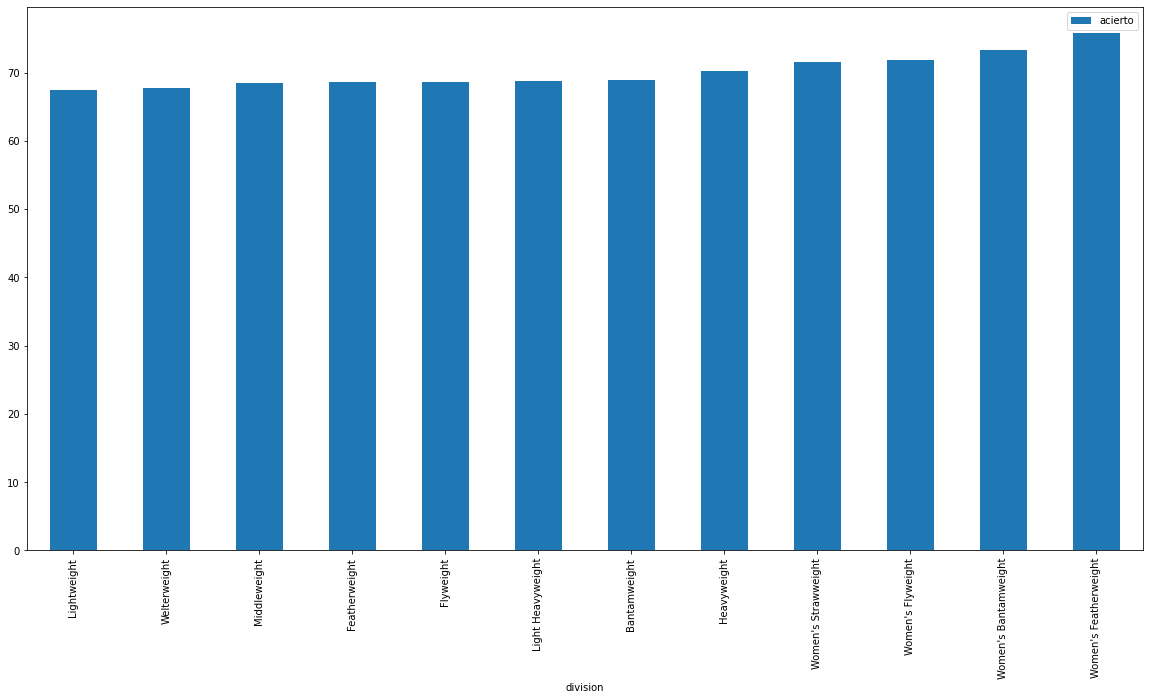

In [125]:
q_p3 = """
select distinct(division), round(sum(c_clinch)/sum(i_clinch)*100,2) as acierto
from division
natural join pertenece
natural join peleador
natural join se_pelean
where division != "Open Weight" and division != "Super Heavyweight" and division != "Catch Weight"
group by division
order by acierto; 
"""
df_pelota3 = pd.read_sql(q_p3, base)

df_pelota3 = df_pelota3.set_index("division")

df_pelota3.plot.bar(figsize=(20, 10));

<p>En la ultima gráfica los top 4 son "Lightweight" seguido de "Welterweight", "Middleweight" y "Featherweight".</p>
<p>Y loas posiciones han queaddo así:</p>
<p>1º Featherweight</p>
<p>2º Lightweight</p>
<p>3º Flyweight</p>
<p>4º Bantamweight</p>


¿Qué categoria de peso quieres consultar?:
1. Bantamweight 
2. Catch Weight 
3. Featherweight 
4. Flyweight 
5. Heavyweight
6. Light Heavyweight 
7. Lightweight 
8. Middleweight 
9. Open Weight 
10. Super Heavyweight
11. Welterweight 
12. Women's Bantamweight 
13. Women's Featherweight 
14. Women's Flyweight
15. Women's Strawweight
None7
¿Qué metodo de victoria quieres consultar?:
 1. U-DEC
 2. S-DEC
 3. M-DEC
 4. SUB
 5. KO/TKO

None5


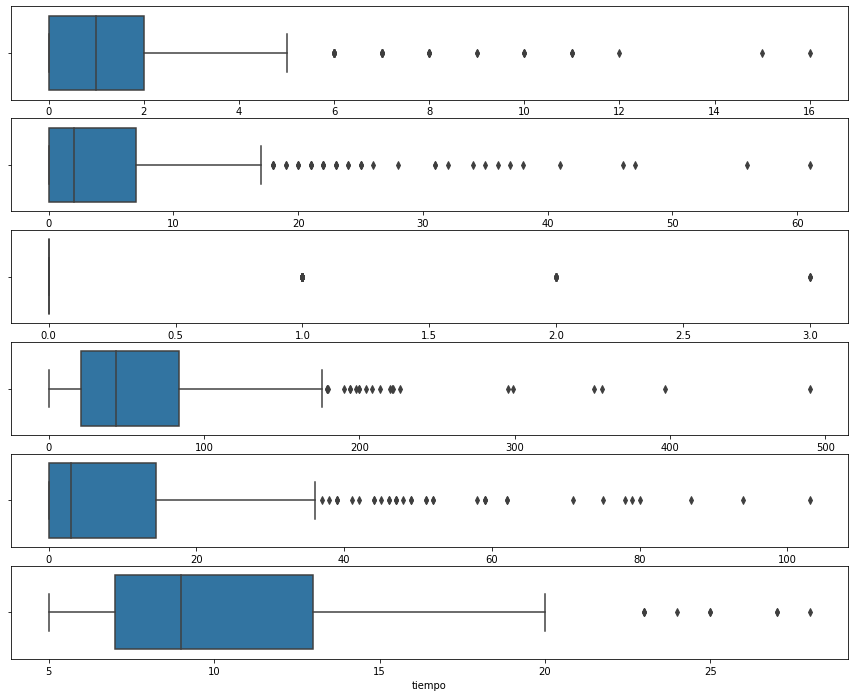

In [4]:
gr.amg(base)

In [4]:
peleadores = ["Charles Oliveira", "Beneil Dariush"]

<AxesSubplot: >

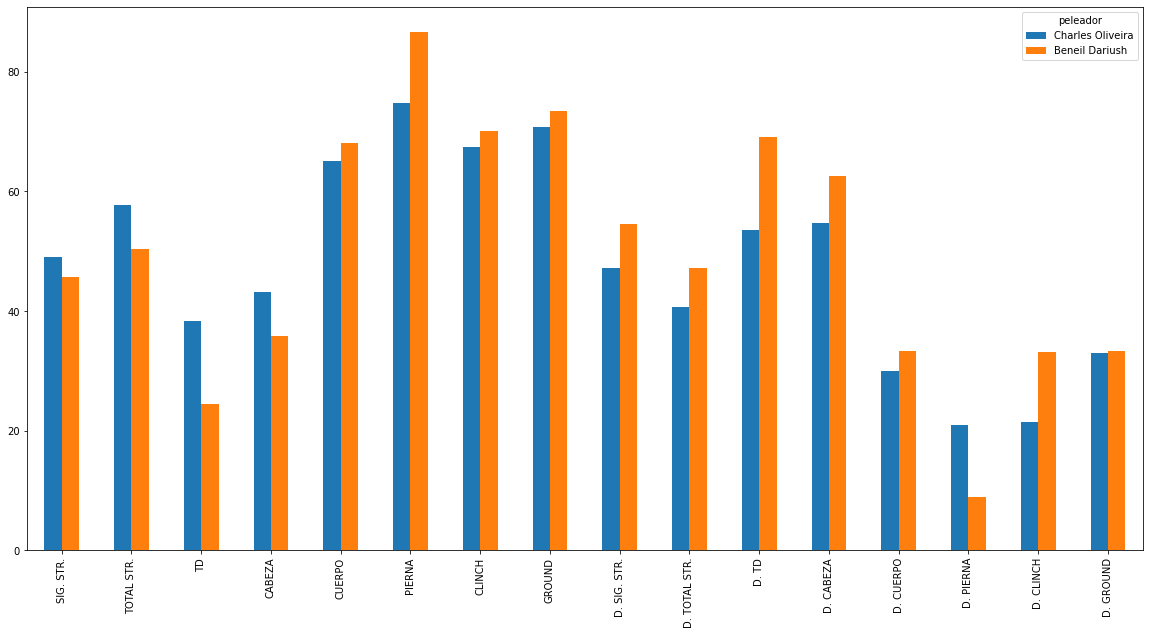

In [6]:
gr.stats(peleadores, base)

¿Que estadistica quieres observar?
 1. SIG. STR
 2. TOTAL STR.
 3. TD 
 4. CABEZA  
 5. CUERPO 
 6. PIERNA 
 7. CLINCH 
 8. GROUND
None1
¿De que peleador quieres la grafica: 
NonePetr Yan


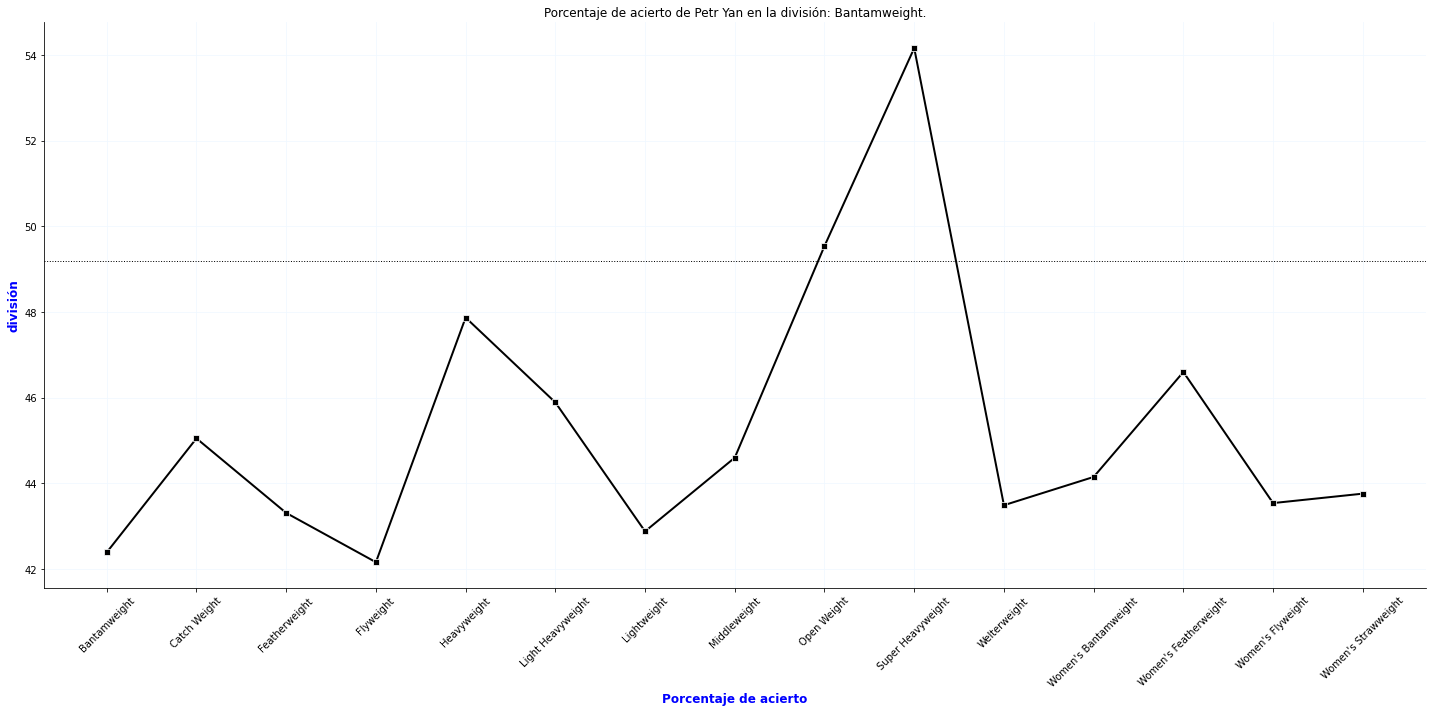

In [4]:
gr.por_conect(base)

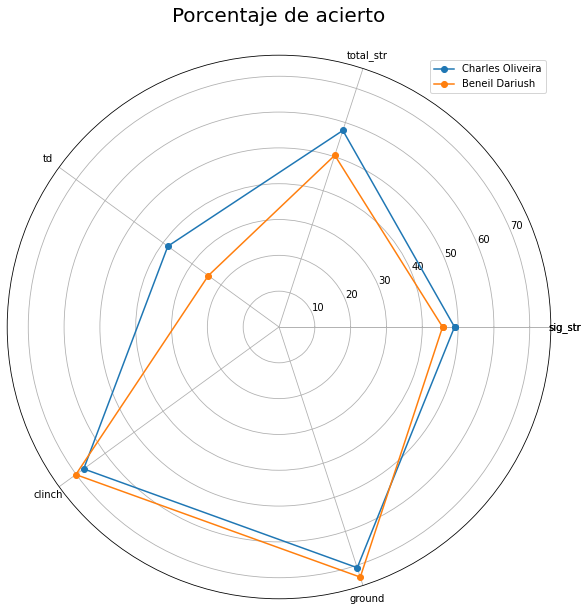

In [12]:
gr.comparate(peleadores, base)